종속 변수의 분산(total sum of square)

$$\text{TSS} = \sum_i (y_i-\bar{y})^2 = (y - \bar{y})^T(y - \bar{y} )$$
<br>

예측한 종속 변수의 분산 (explained sum of squares)

$$\text{ESS}=\sum_i (\hat{y}_i -\bar{\hat{y}})^2 = (\hat{y} - \bar{\hat{y}})^T(\hat{y} - \bar{\hat{y}})$$
<br>

잔차제곱합(RSS: Residula Sum of Square)

$$\text{RSS}=\sum_i (y_i - \hat{y}_i)^2\ = e^Te$$

위 식에서 $\bar{\hat{y}}$는 모형 예측값의 평균이다.

또한 **ESS는 모형에서 나온 예측값의 움직임의 범위**, **RSS는 잔차의 움직임의 범위, 즉 오차의 크기**를 뜻한다고 볼 수 있다.

만약 회귀모형이 올바르게 정의되었다면 잔차의 평균이 0이 된다.
$$ \bar{e} = \bar{y} - \bar{\hat{y}} = 0$$

$$ \bar{y} = \bar{\hat{y}} $$

$$\text{TSS} = \text{ESS} + \text{RSS}$$

In [7]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.75789830607
ESS =  188589.61349210917
RSS =  102754.33755137534
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922585


위의 분산 관계식에서 모형의 성능을 나타내는 결정계수(Coefficient of Determination) $R^2$를 정의할 수 있다.

$$R^2 \equiv 1 - \dfrac{\text{RSS}}{\text{TSS}}\ = \dfrac{\text{ESS}}{\text{TSS}}\ $$

## 분산 분석표

NN 은 데이터의 갯수, KK는 모수의 갯수

| source | degree of freedom | sum of square | mean square  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Regression| $$K-1$$ | $$\text{ESS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Residual | $$N-K$$  | $$\text{RSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | |
| $R^2$   |    |  $$\text{ESS} / \text{TSS}$$ |  | |


## F 검정을 사용한 변수 중요도 비교

F 검정은 각 독립변수의 중요도를 비교하기 위해 사용할 수 있다. 
방법은 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하는 것이다. 이는 간접적으로 각 독립 변수의 영향력을 측정하는 것과 같다.

`anova_lm` 명령에서는 `typ=2`로 지정하여 각 모형에서의 F 검정을 계산할 수 있다.

In [9]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11080.276284,1.0,241.727993,10.733502,0.001126


In [10]:
model_boston = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,241.727993,1.0,10.733502,1.126402e-03
ZN,257.226157,1.0,11.421671,7.836070e-04
INDUS,2.591314,1.0,0.115063,7.345971e-01
NOX,488.605951,1.0,21.695680,4.117296e-06
RM,1865.902935,1.0,82.852108,2.207486e-18
AGE,0.072792,1.0,0.003232,9.546859e-01
DIS,1232.544417,1.0,54.728947,6.017651e-13
RAD,478.172457,1.0,21.232399,5.189664e-06
TAX,242.053549,1.0,10.747958,1.117826e-03
PTRATIO,1195.939414,1.0,53.103567,1.268218e-12


In [14]:
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 11 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        18:11:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

보스턴 집값 자료에서 변수 CHAS의 영향을 분산 분석으로 알아보면 다음과 같다.


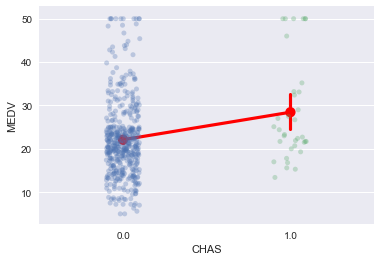

In [12]:
sns.stripplot(x="CHAS", y="MEDV", data=df_boston, jitter=True, alpha=.3)
sns.pointplot(x="CHAS", y="MEDV", data=df_boston, dodge=True, color='r')
plt.show()